# Bibliotecas e Configurações

Destinado a importação de bibliotecas e configurações globais

#### Default

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import utils
import importlib

## Configs

importlib.reload(utils)
pd.set_option('display.max_columns', None)  # Mostra todas as colunas
pd.set_option('display.max_rows', 100)      # Mostra até 100 linhas
pd.set_option('display.max_colwidth', 100)  # Máxima largura da coluna
pd.set_option('display.float_format', '{:.2f}'.format)  # Formato dos números flutuantes
pd.set_option('display.expand_frame_repr', False)  # Não quebra o DataFrame em múltiplas linhas
pd.set_option('display.max_rows', None)  # Mostra todas as linhas no output
warnings.filterwarnings('ignore')

# Colors
colors = ['#705557', '#b27b77', '#ddcac6', '#af9294', '#8c9a5b', '#708090', '#c5a880', '#a0522d']

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)
sns.set_palette(sns.color_palette(colors))  


#### ML and Statis

In [237]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from math import pi
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score,  recall_score, f1_score
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression





## Params

# Import Data Base


In [110]:
pasta_raw = '../data/raw/'
pasta_stage = '../data/stage/'
pasta_analitics = '../data/analitics/'

In [111]:
df_seeds = pd.read_csv(pasta_raw + 'seeds_dataset.txt', delim_whitespace=True, header=None)

### Metadados

In [112]:
metadados = {
    "Area": {
        "index": 0,
        "descricao": "Medida da área do grão de trigo.",
        "tipo": "dependente",
        "analise": 0
    },
    "Perimeter": {
        "index": 1,
        "descricao": "Perímetro do grão de trigo.",
        "tipo": "dependente",
        "analise": 0
    },
    "Compactness": {
        "index": 2,
        "descricao": "Compactação do grão calculada como 4*pi*area/perimeter^2.",
        "tipo": "dependente",
        "analise": 0
    },
    "KernelLength": {
        "index": 3,
        "descricao": "Comprimento do eixo principal do núcleo do grão.",
        "tipo": "dependente",
        "analise": 0
    },
    "KernelWidth": {
        "index": 4,
        "descricao": "Largura do eixo secundário do núcleo do grão.",
        "tipo": "dependente",
        "analise": 0
    },
    "AsymmetryCoefficient": {
        "index": 5,
        "descricao": "Coeficiente de assimetria do grão.",
        "tipo": "dependente",
        "analise": 0
    },
    "GrooveLength": {
        "index": 6,
        "descricao": "Comprimento do sulco do núcleo do grão.",
        "tipo": "dependente",
        "analise": 0
    },
    "Variety": {
        "index": 7,
        "descricao": "Variedade do grão de trigo (1: Kama, 2: Rosa, 3: Canadian).",
        "tipo": "independente",
        "analise": 0
    }
}

variety_map = {1: 'Kama', 2: 'Rosa', 3: 'Canadian'}


In [113]:
df_seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       210 non-null    float64
 1   1       210 non-null    float64
 2   2       210 non-null    float64
 3   3       210 non-null    float64
 4   4       210 non-null    float64
 5   5       210 non-null    float64
 6   6       210 non-null    float64
 7   7       210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


# Data Transform

In [114]:
df_seeds.columns = [
    'Area', 
    'Perimeter', 
    'Compactness', 
    'KernelLength', 
    'KernelWidth', 
    'AsymmetryCoefficient', 
    'GrooveLength', 
    'Variety'
]

In [115]:
df_seeds.head()

,Area,Perimeter,Compactness,KernelLength,KernelWidth,AsymmetryCoefficient,GrooveLength,Variety
0,15.26,14.84,0.87,5.76,3.31,2.22,5.22,1
1,14.88,14.57,0.88,5.55,3.33,1.02,4.96,1
2,14.29,14.09,0.91,5.29,3.34,2.70,4.83,1
3,13.84,13.94,0.90,5.32,3.38,2.26,4.80,1
4,16.14,14.99,0.90,5.66,3.56,1.35,5.17,1


In [116]:
df_seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Area                  210 non-null    float64
 1   Perimeter             210 non-null    float64
 2   Compactness           210 non-null    float64
 3   KernelLength          210 non-null    float64
 4   KernelWidth           210 non-null    float64
 5   AsymmetryCoefficient  210 non-null    float64
 6   GrooveLength          210 non-null    float64
 7   Variety               210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


In [117]:
df_seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Area                  210 non-null    float64
 1   Perimeter             210 non-null    float64
 2   Compactness           210 non-null    float64
 3   KernelLength          210 non-null    float64
 4   KernelWidth           210 non-null    float64
 5   AsymmetryCoefficient  210 non-null    float64
 6   GrooveLength          210 non-null    float64
 7   Variety               210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


In [118]:
df_seeds['Variety'] = df_seeds['Variety'].astype('category')

Salvar as alterações em stage

In [119]:
df_seeds.to_csv(pasta_stage + 'stage_seeds.csv', index=False)

Nomralizando os dados

In [120]:
# Normalizar as características contínuas
df_seeds_normalizer = df_seeds.copy()
scaler = StandardScaler()
features = ['Area', 'Perimeter', 'Compactness', 'KernelLength', 'KernelWidth', 'AsymmetryCoefficient', 'GrooveLength']
df_seeds_normalizer[features] = scaler.fit_transform(df_seeds_normalizer[features])


Salvar alterações em analitcs

In [121]:
df_seeds_normalizer.to_csv(pasta_analitics + 'stage_seeds_normalizer.csv', index=False)

# Exploratory

In [122]:
df_seeds_normalizer.describe()

,Area,Perimeter,Compactness,KernelLength,KernelWidth,AsymmetryCoefficient,GrooveLength
count,210.00,210.00,210.00,210.00,210.00,210.00,210.00
mean,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.47,-1.65,-2.67,-1.65,-1.67,-1.96,-1.81
25%,-0.89,-0.85,-0.60,-0.83,-0.83,-0.76,-0.74
50%,-0.17,-0.18,0.10,-0.24,-0.06,-0.07,-0.38
75%,0.85,0.89,0.71,0.79,0.80,0.71,0.96
max,2.18,2.07,2.01,2.37,2.06,3.17,2.33


In [128]:
df_seeds_normalizer.head()

,Area,Perimeter,Compactness,KernelLength,KernelWidth,AsymmetryCoefficient,GrooveLength,Variety,Variety_numeric
0,0.14,0.22,0.00,0.30,0.14,-0.99,-0.38,Kama,1
1,0.01,0.01,0.43,-0.17,0.20,-1.79,-0.92,Kama,1
2,-0.19,-0.36,1.44,-0.76,0.21,-0.67,-1.19,Kama,1
3,-0.35,-0.48,1.04,-0.69,0.32,-0.96,-1.23,Kama,1
4,0.45,0.33,1.37,0.07,0.81,-1.56,-0.48,Kama,1


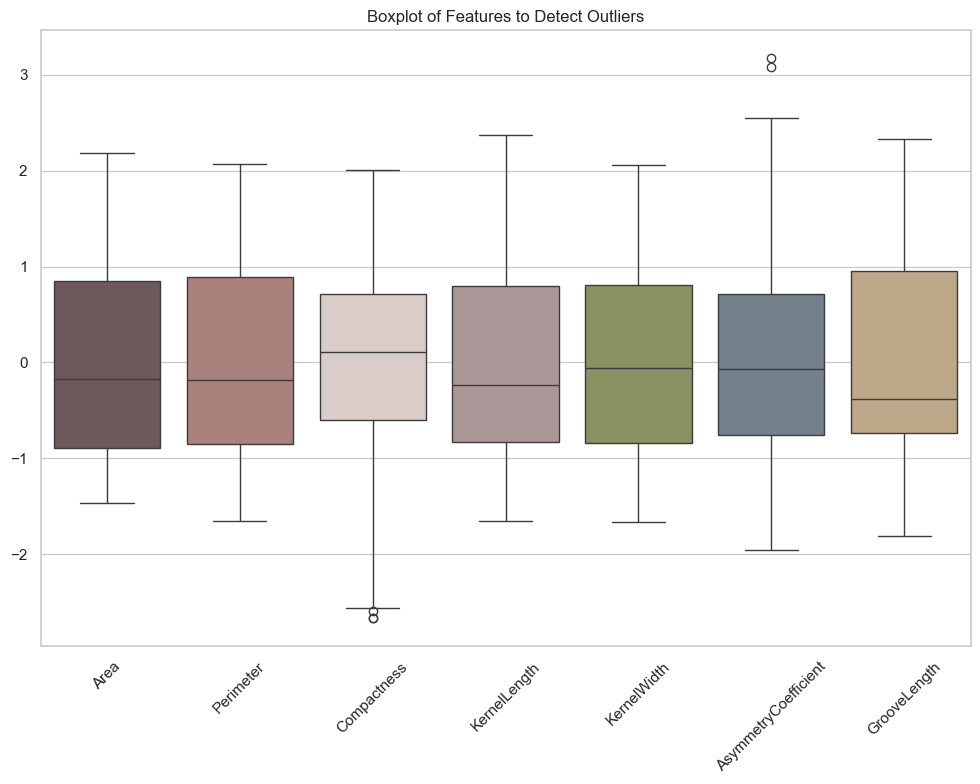

In [123]:
# Visualização de outliers com boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_seeds_normalizer[features])
plt.title('Boxplot of Features to Detect Outliers')
plt.xticks(rotation=45)
plt.show()


In [124]:
# Manter a coluna Variety com valores categóricos numéricos
df_seeds_normalizer['Variety_numeric'] = df_seeds_normalizer['Variety']

# Mapear cada variedade para seu nome correspondente
variety_map = {1: 'Kama', 2: 'Rosa', 3: 'Canadian'}
df_seeds_normalizer['Variety'] = df_seeds_normalizer['Variety'].map(variety_map)

# Criar colunas binárias para cada variedade (one-hot encoding), enquanto mantém a coluna original
df_seeds_one_hot = pd.get_dummies(df_seeds_normalizer, columns=['Variety'], prefix='', prefix_sep='')

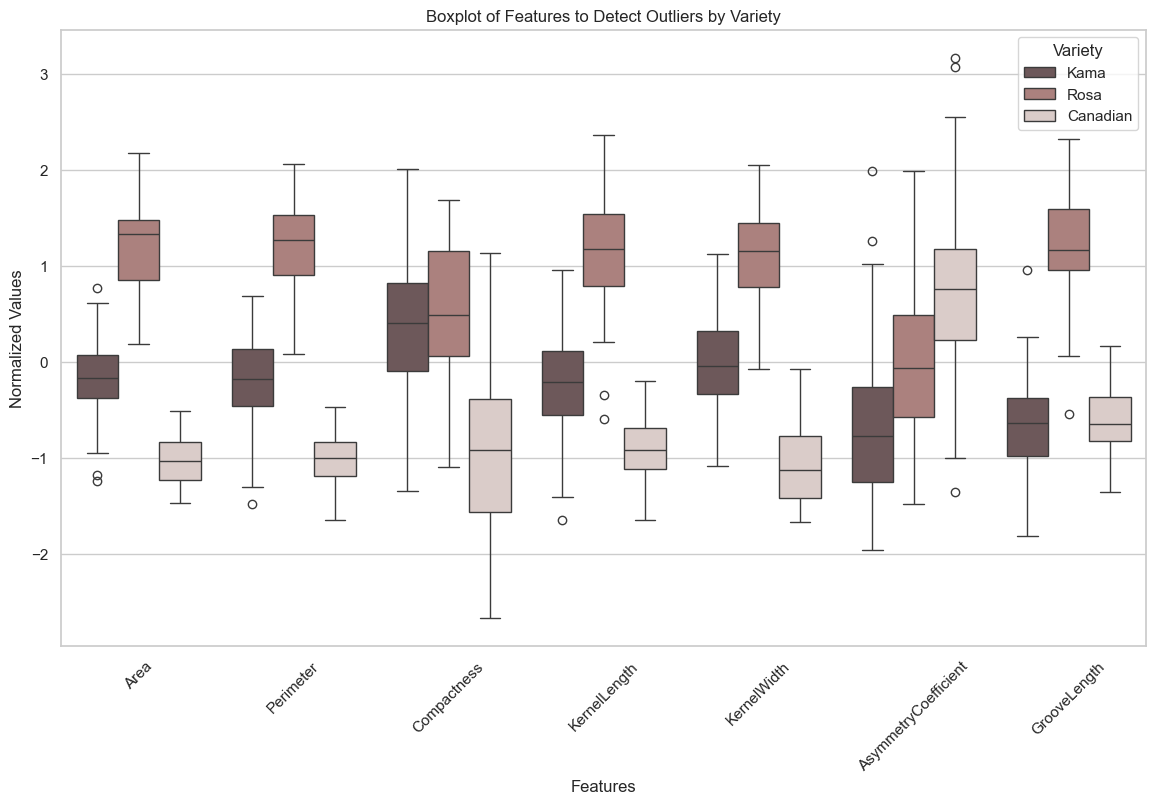

In [127]:
df_melted = pd.melt(df_seeds_normalizer, id_vars='Variety', value_vars=features)

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_melted, x='variable', y='value', hue='Variety')
plt.title('Boxplot of Features to Detect Outliers by Variety')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Normalized Values')
plt.legend(title='Variety')
plt.show()

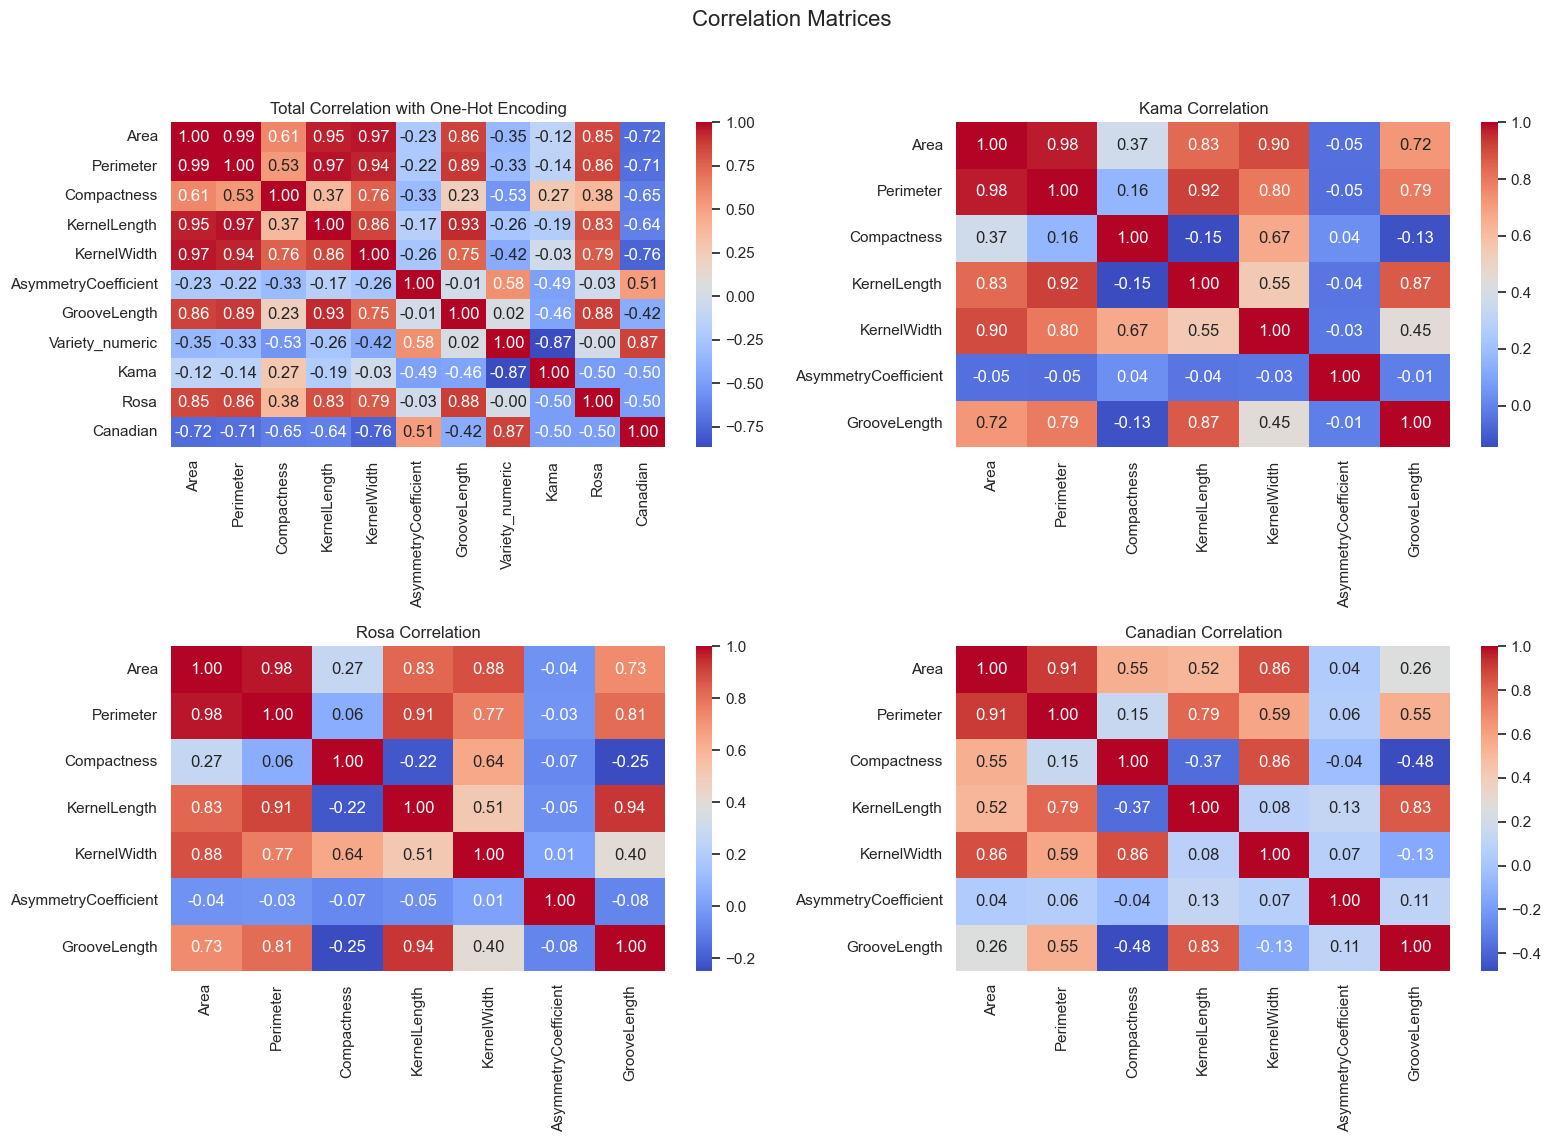

In [99]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Correlation Matrices', fontsize=16)

# Matriz de correlação total
sns.heatmap(df_seeds_one_hot.corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0, 0])
axes[0, 0].set_title('Total Correlation with One-Hot Encoding')

# Gerar matrizes de correlação para cada variedade usando 'Variety_numeric' para filtragem
for ax, (key, variety_name) in zip(axes.flat[1:], variety_map.items()):
    df_variety = df_seeds_normalizer[df_seeds_normalizer['Variety_numeric'] == key]
    sns.heatmap(df_variety[features].corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
    ax.set_title(f'{variety_name} Correlation')

# Ajustar layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

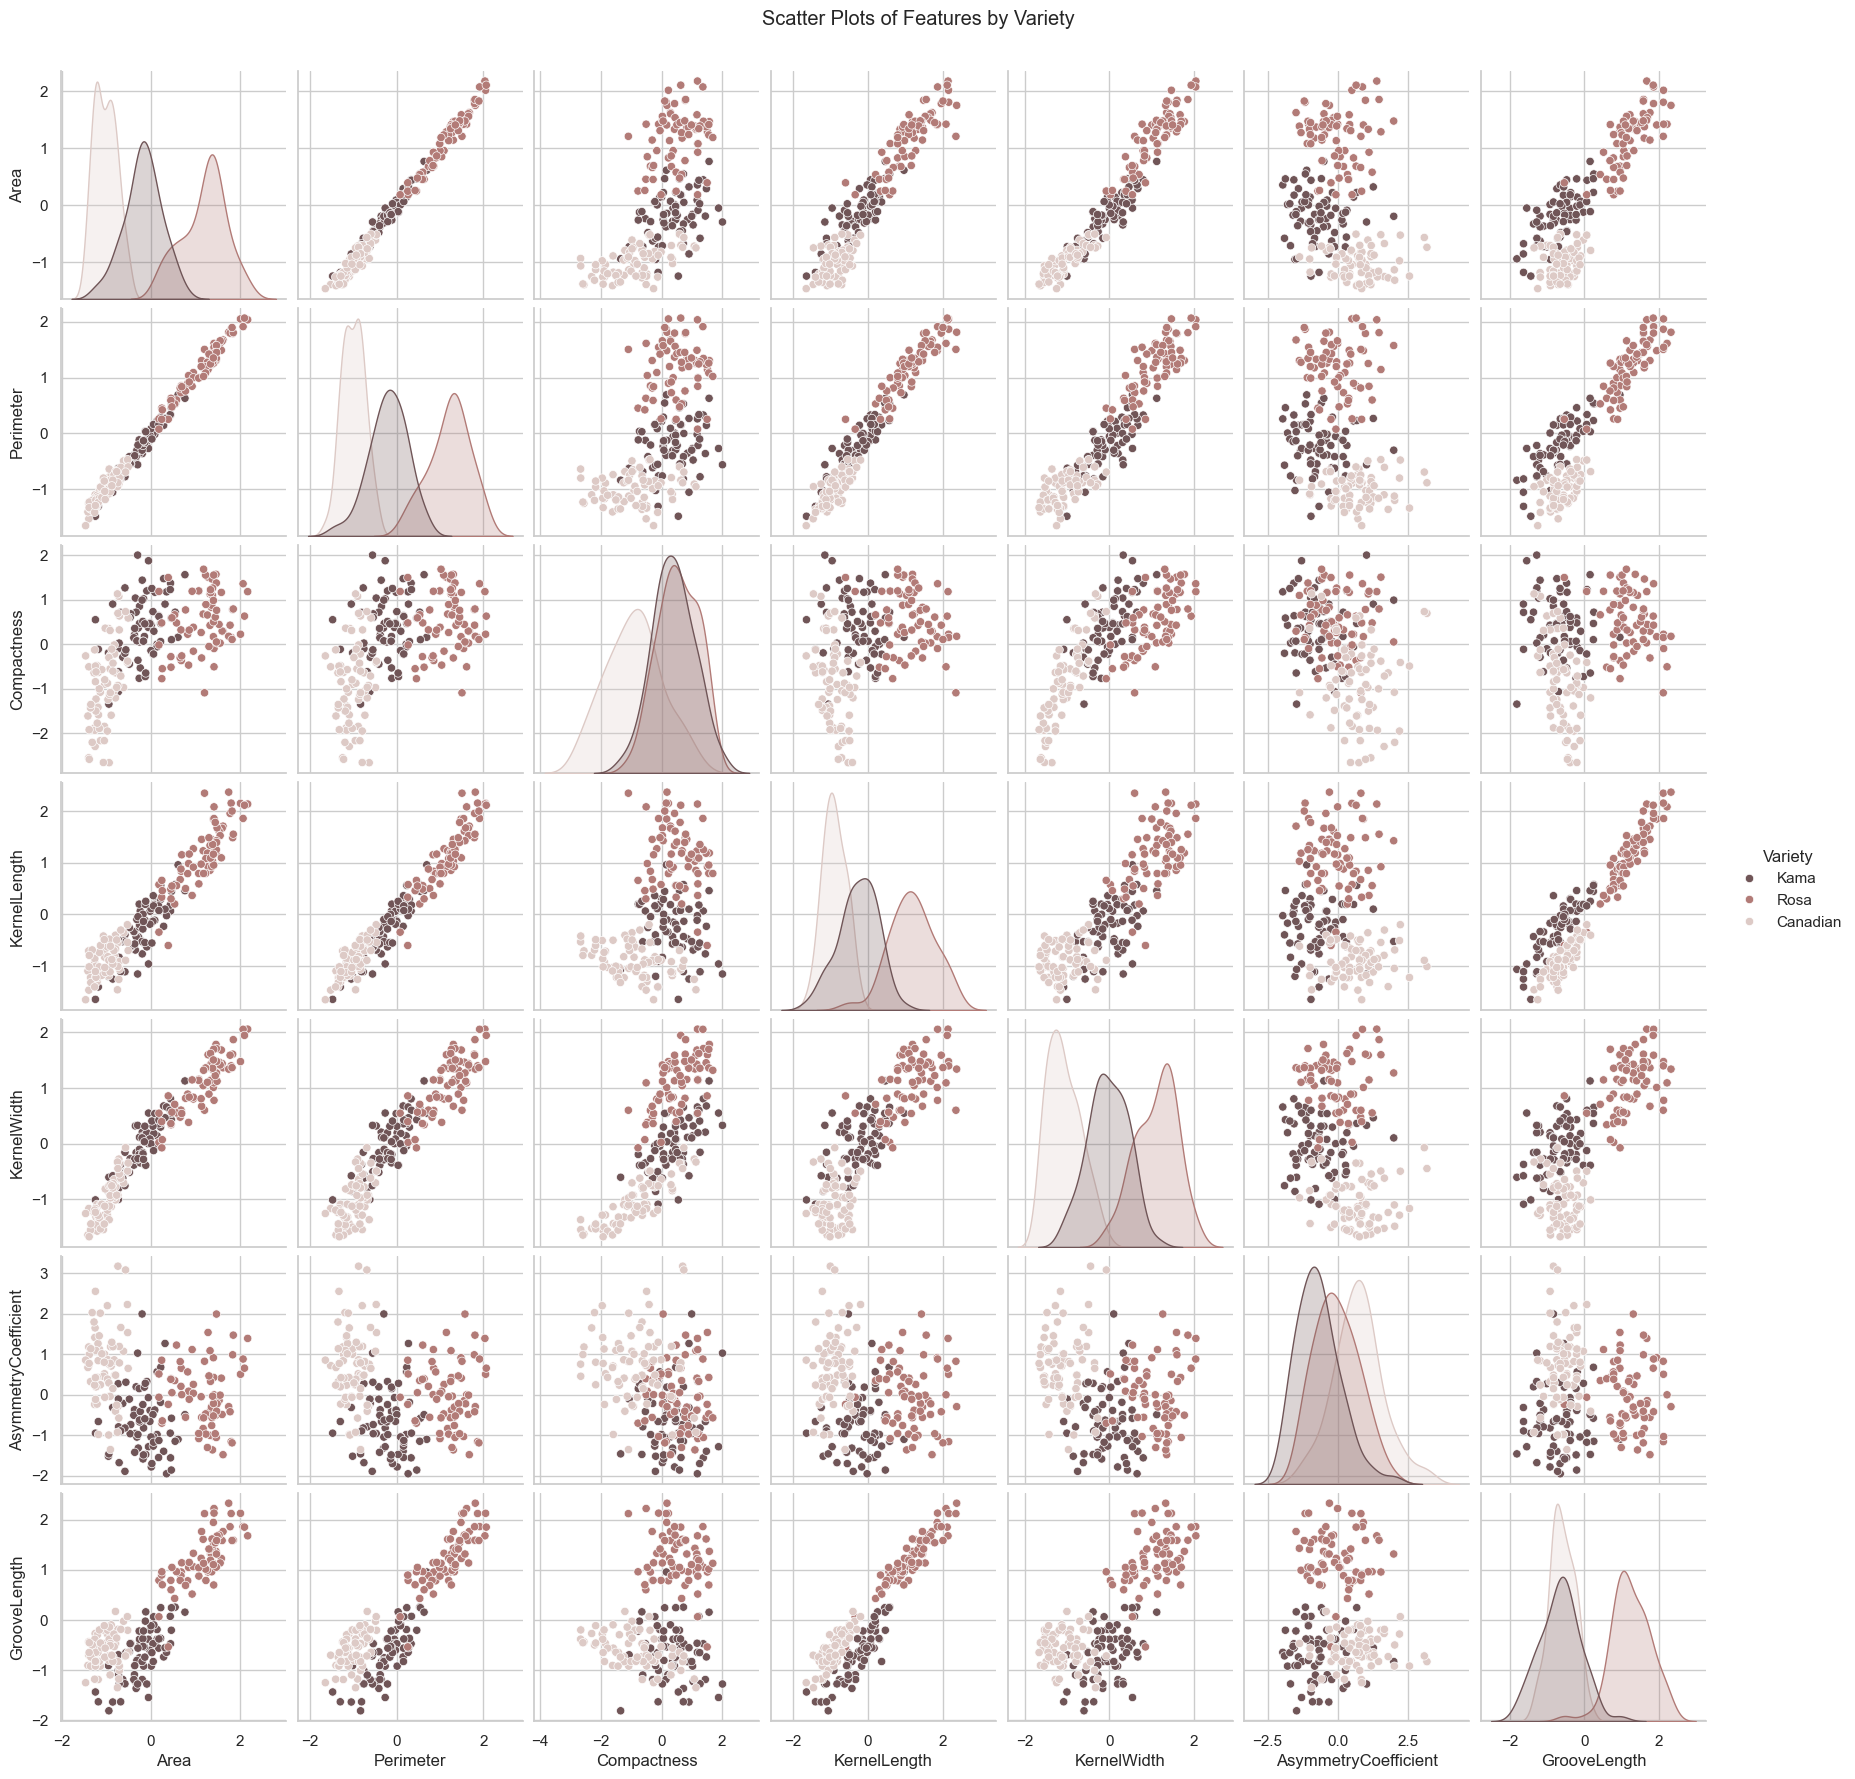

In [101]:
# Gráficos de Dispersão
sns.pairplot(df_seeds_normalizer, diag_kind='kde', hue='Variety')
plt.suptitle('Scatter Plots of Features by Variety', y=1.02)
plt.show()

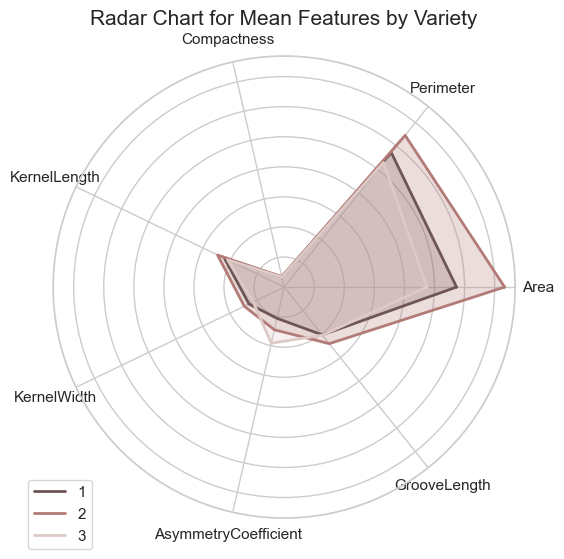

In [129]:
# Calcular média para cada variedade
means = df_seeds.groupby('Variety').mean()

# Configurar o gráfico de radar
categories = list(means.columns)
N = len(categories)

# Ângulos para os eixos do gráfico de radar
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Criar o gráfico de radar para cada variedade
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(polar=True))
for i, (variety, row) in enumerate(means.iterrows()):
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, color=colors[i], linewidth=2, linestyle='solid', label=variety)
    ax.fill(angles, values, color=colors[i], alpha=0.25)

# Adicionar rótulos e título
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title('Radar Chart for Mean Features by Variety', fontsize=15)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

# ML

In [213]:
features = ['Area', 'Perimeter', 'Compactness', 'KernelLength', 'KernelWidth', 'AsymmetryCoefficient', 'GrooveLength']
target = 'Variety'

# Separar as características X e o alvo y
X = df_seeds_normalizer[features]
y = df_seeds_normalizer[target]

# Codificar as classes do alvo
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Informações sobre a divisão
print("Tamanho do conjunto de treinamento:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)


Tamanho do conjunto de treinamento: (147, 7)
Tamanho do conjunto de teste: (63, 7)


In [231]:
def evaluate_model(X_train, X_test, y_train, y_test, model, model_name, hyperparameters=None, search_param=None):
    """
    Avalia o modelo fornecido em termos de visualização de fronteiras de decisão e acurácia.

    :param X_train: Conjunto de treinamento
    :param X_test: Conjunto de teste
    :param y_train: Rótulos do conjunto de treinamento
    :param y_test: Rótulos do conjunto de teste
    :param model: Instância do modelo de aprendizado
    :param model_name: Nome do modelo de aprendizado
    :param hyperparameters: Dicionário de hiperparâmetros e seus valores a serem testados
    :param search_param: Hiperparâmetro a ser otimizado
    """
    # Normalização dos dados
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Aplicar PCA para reduzir a dimensionalidade para visualização
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train_scaled)

    # Treinar o modelo para visualização
    model.fit(X_train_pca, y_train)

    # Criar uma grade de pontos para traçar as fronteiras de decisão
    x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
    y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    # Prever as classes para cada ponto da grade
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotar as fronteiras de decisão e os pontos de dados
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', cmap='coolwarm', marker='o')
    plt.title(f'Fronteiras de Decisão do {model_name} após PCA')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')

    # Ajustar a legenda manualmente para os rótulos das classes
    legend_labels = ['Kama', 'Rosa', 'Canadian']
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10) for i in range(len(legend_labels))]
    plt.legend(handles, legend_labels, title="Classes")
    plt.show()

    # Otimização de hiperparâmetros
    if hyperparameters and search_param:
        accuracies = []
        for param_value in hyperparameters[search_param]:
            model.set_params(**{search_param: param_value})
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            accuracies.append(accuracy_score(y_test, y_pred))
        
        plt.figure(figsize=(10, 6))
        plt.plot(hyperparameters[search_param], accuracies, marker='o', linestyle='-')
        plt.xscale('log') if search_param == 'C' else plt.xticks(hyperparameters[search_param])
        plt.title(f'Acurácia do {model_name} para Diferentes Valores de {search_param}', fontsize=15)
        plt.xlabel(f'Valor de {search_param} (Log Scale)' if search_param == 'C' else f'Valor de {search_param}')
        plt.ylabel('Acurácia')
        plt.grid(True)
        plt.show()

        # Selecionar o melhor parâmetro com base na acurácia máxima
        best_param_value = hyperparameters[search_param][np.argmax(accuracies)]
        print(f'O melhor valor de {search_param} é: {best_param_value}')
        model.set_params(**{search_param: best_param_value})

    # Treinar o modelo final com o melhor parâmetro
    model.fit(X_train_scaled, y_train)
    y_pred_final = model.predict(X_test_scaled)

    # Avaliar o desempenho do modelo final
    accuracy_final = accuracy_score(y_test, y_pred_final)
    conf_matrix = confusion_matrix(y_test, y_pred_final)
    class_report = classification_report(y_test, y_pred_final, target_names=['Kama', 'Rosa', 'Canadian'])

    print(f'Acurácia do {model_name}: {accuracy_final:.2f}')
    print('\nRelatório de Classificação:')
    print(class_report)

    # Visualizar a matriz de confusão
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Kama', 'Rosa', 'Canadian'], yticklabels=['Kama', 'Rosa', 'Canadian'])
    plt.title(f'Matriz de Confusão do {model_name}')
    plt.xlabel('Classe Predita')
    plt.ylabel('Classe Verdadeira')
    plt.show()


## K-Nearest Neighbors (KNN)

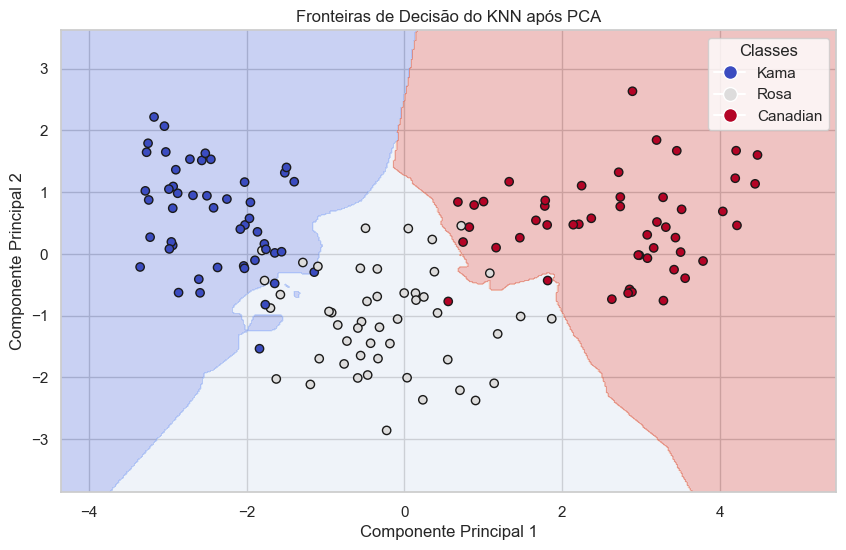

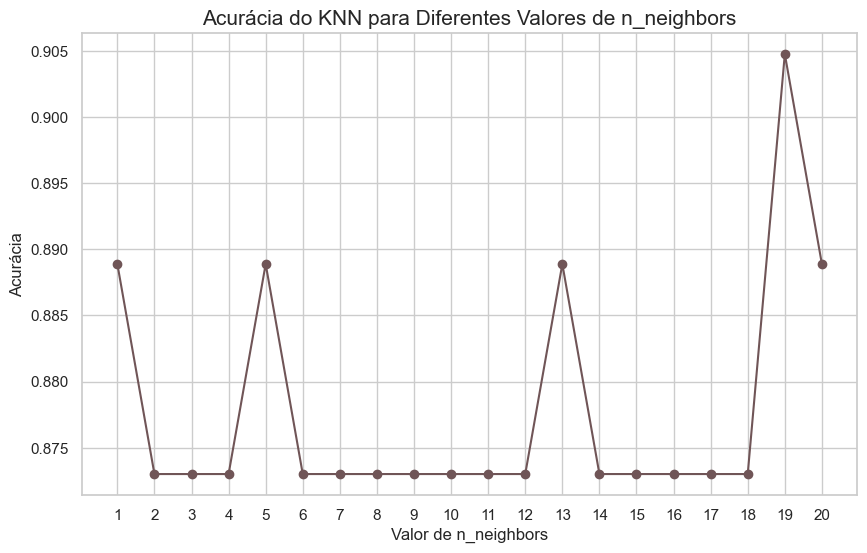

O melhor valor de n_neighbors é: 19
Acurácia do KNN: 0.90

Relatório de Classificação:
              precision    recall  f1-score   support

        Kama       0.90      0.90      0.90        21
        Rosa       0.86      0.86      0.86        21
    Canadian       0.95      0.95      0.95        21

    accuracy                           0.90        63
   macro avg       0.90      0.90      0.90        63
weighted avg       0.90      0.90      0.90        63



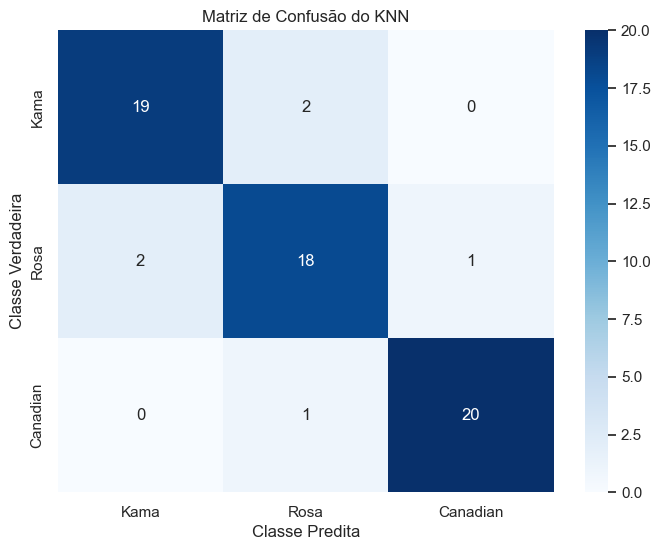

In [232]:
# Exemplo de uso para KNN
evaluate_model(X_train, X_test, y_train, y_test,
               model=KNeighborsClassifier(),
               model_name='KNN',
               hyperparameters={'n_neighbors': range(1, 21)},
               search_param='n_neighbors')

## Support Vector Machine (SVM);

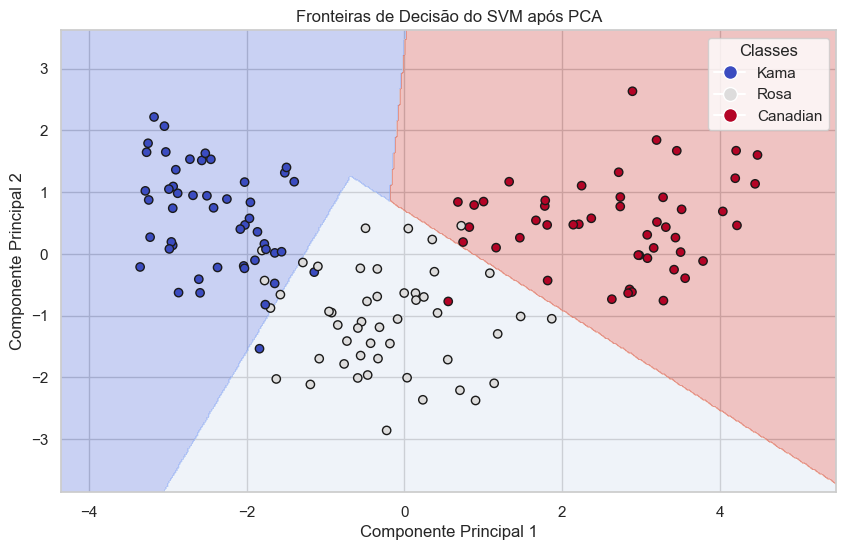

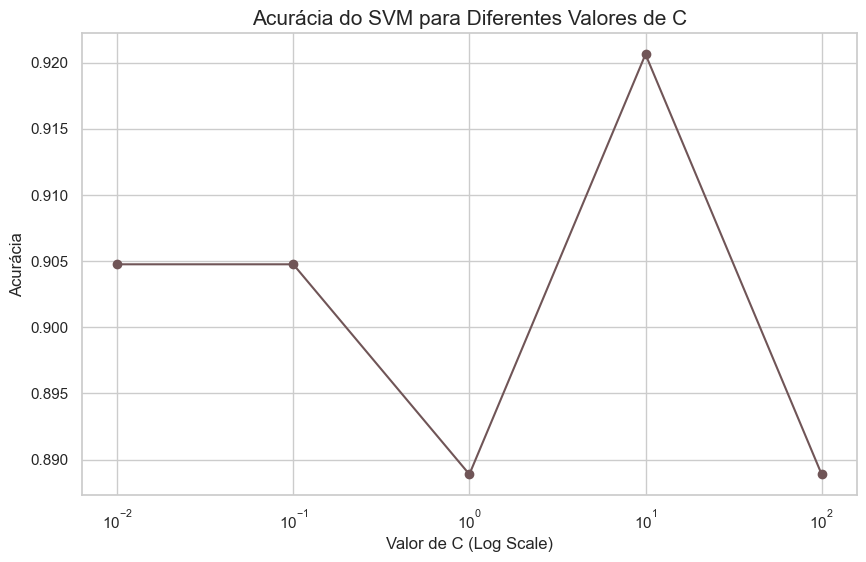

O melhor valor de C é: 10.0
Acurácia do SVM: 0.92

Relatório de Classificação:
              precision    recall  f1-score   support

        Kama       0.88      1.00      0.93        21
        Rosa       0.94      0.81      0.87        21
    Canadian       0.95      0.95      0.95        21

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63



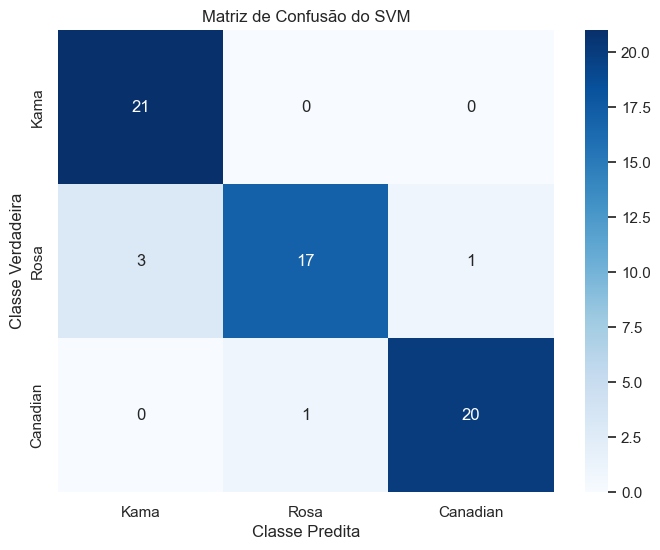

In [233]:
evaluate_model(X_train, X_test, y_train, y_test,
               model=SVC(kernel='linear'),
               model_name='SVM',
               hyperparameters={'C': np.logspace(-2, 2, 5)},
               search_param='C')



## Random Forest

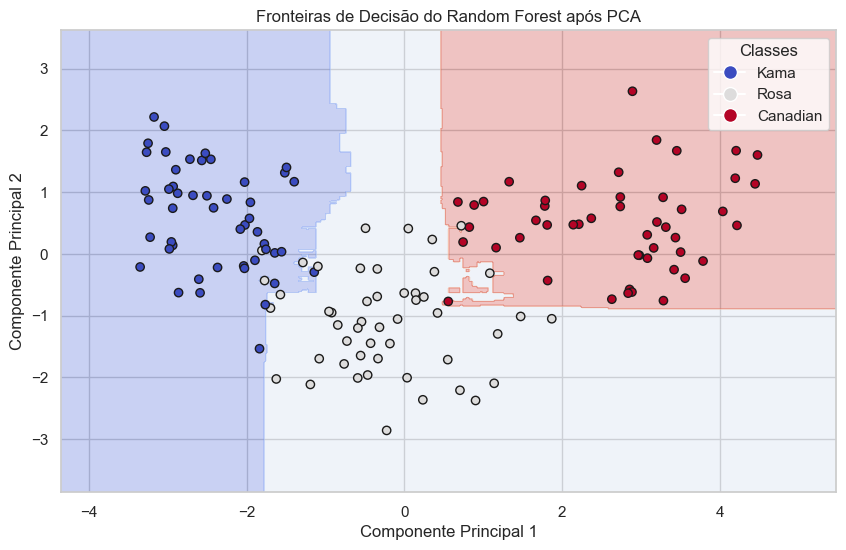

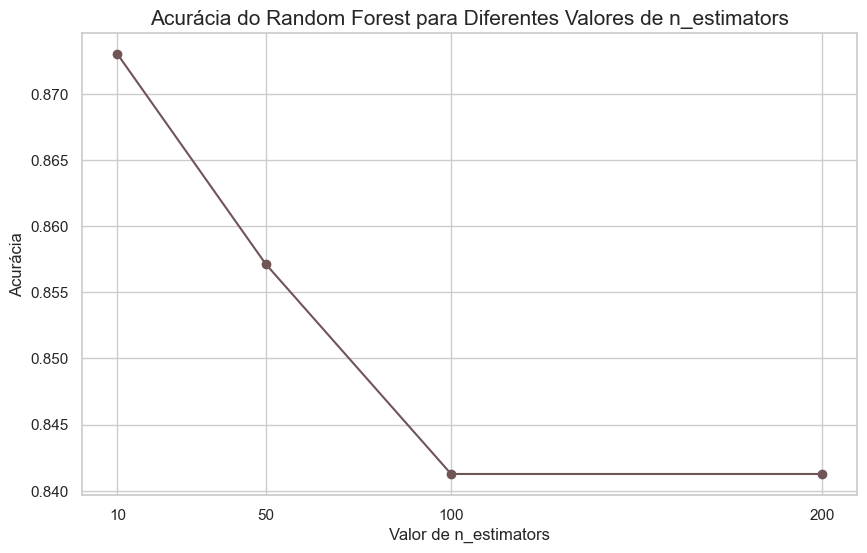

O melhor valor de n_estimators é: 10
Acurácia do Random Forest: 0.84

Relatório de Classificação:
              precision    recall  f1-score   support

        Kama       0.78      0.86      0.82        21
        Rosa       0.79      0.71      0.75        21
    Canadian       0.95      0.95      0.95        21

    accuracy                           0.84        63
   macro avg       0.84      0.84      0.84        63
weighted avg       0.84      0.84      0.84        63



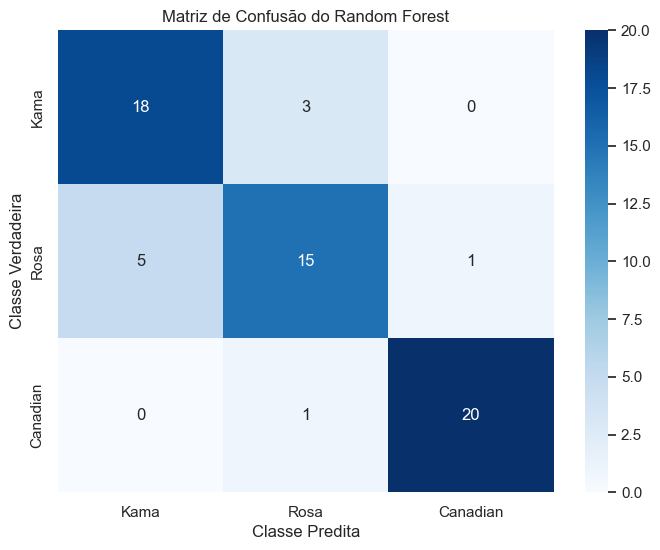

In [234]:
evaluate_model(X_train, X_test, y_train, y_test,
               model=RandomForestClassifier(),
               model_name='Random Forest',
               hyperparameters={'n_estimators': [10, 50, 100, 200]},
               search_param='n_estimators')

## Nayve Bays

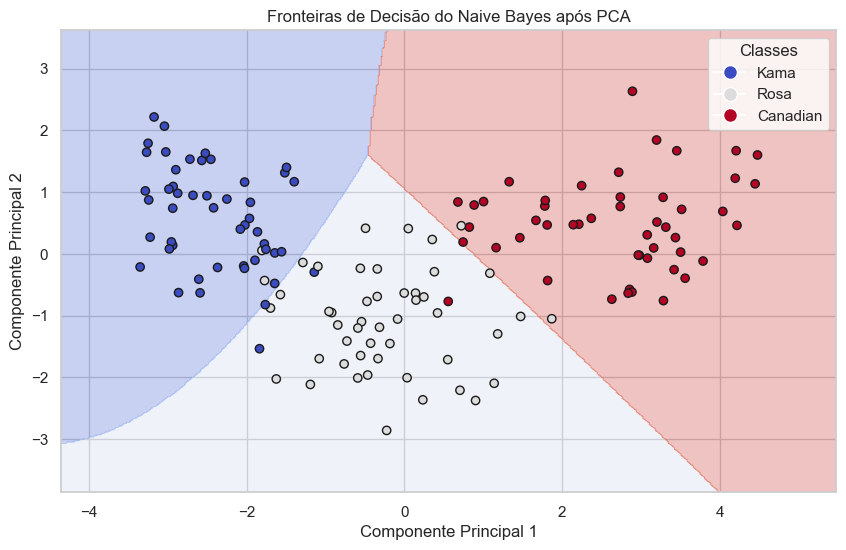

Acurácia do Naive Bayes: 0.84

Relatório de Classificação:
              precision    recall  f1-score   support

        Kama       0.78      0.86      0.82        21
        Rosa       0.79      0.71      0.75        21
    Canadian       0.95      0.95      0.95        21

    accuracy                           0.84        63
   macro avg       0.84      0.84      0.84        63
weighted avg       0.84      0.84      0.84        63



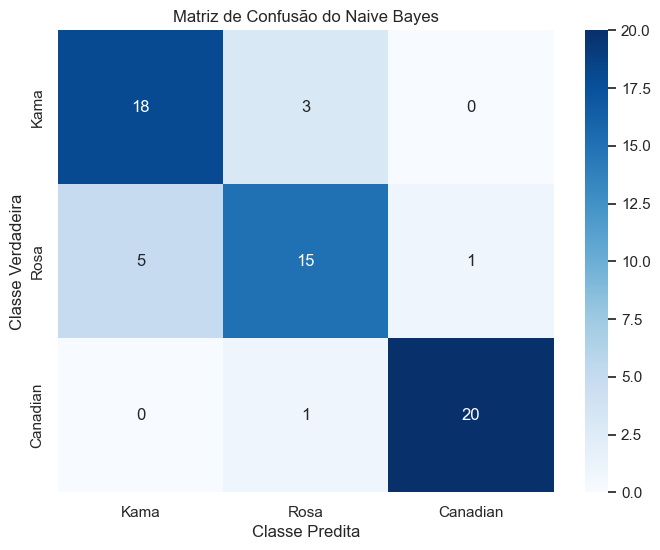

In [235]:
evaluate_model(X_train, X_test, y_train, y_test,
               model=GaussianNB(),
               model_name='Naive Bayes')

## Regressão Logística

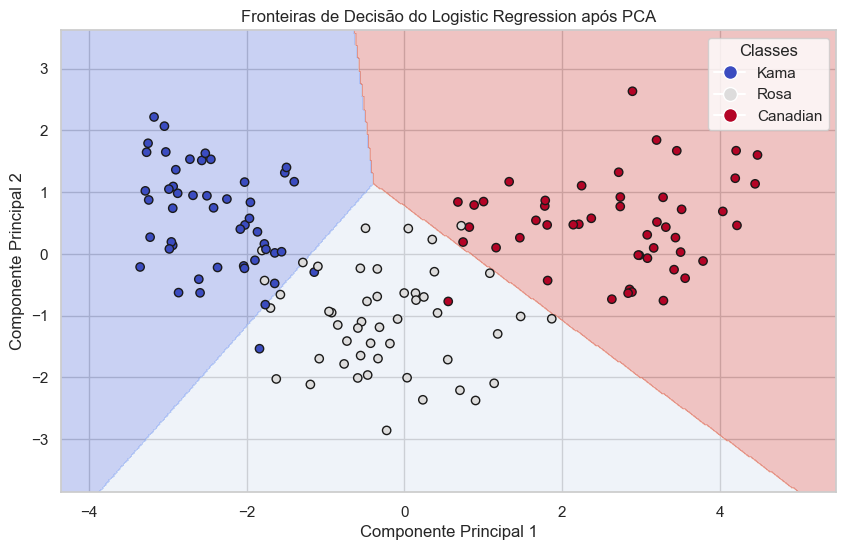

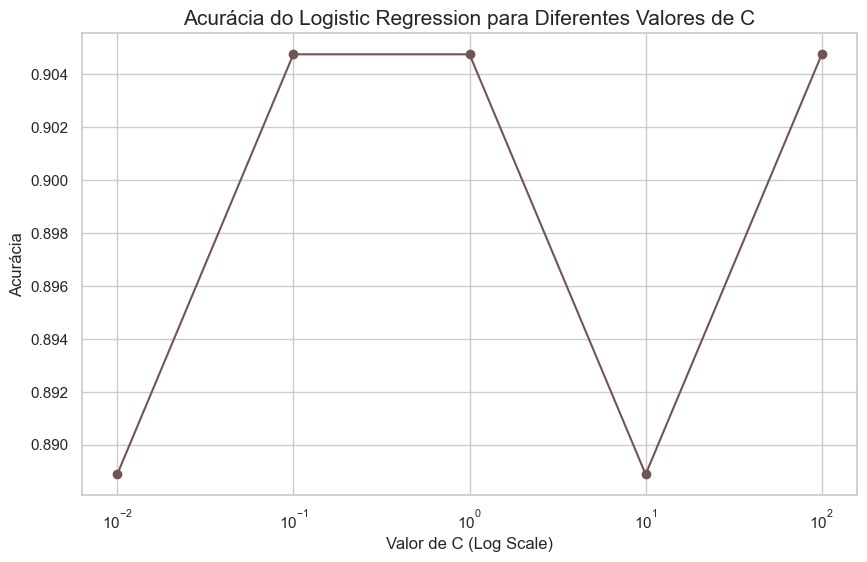

O melhor valor de C é: 0.1
Acurácia do Logistic Regression: 0.90

Relatório de Classificação:
              precision    recall  f1-score   support

        Kama       0.90      0.90      0.90        21
        Rosa       0.86      0.86      0.86        21
    Canadian       0.95      0.95      0.95        21

    accuracy                           0.90        63
   macro avg       0.90      0.90      0.90        63
weighted avg       0.90      0.90      0.90        63



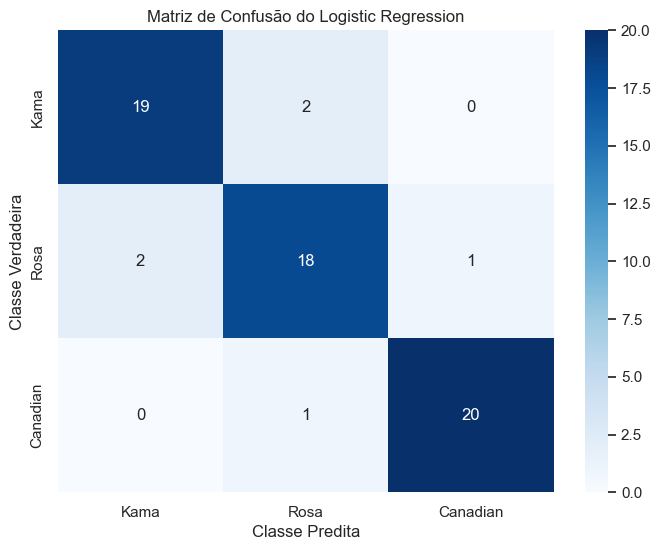

In [236]:
evaluate_model(X_train, X_test, y_train, y_test,
               model=LogisticRegression(max_iter=1000),
               model_name='Logistic Regression',
               hyperparameters={'C': np.logspace(-2, 2, 5)},
               search_param='C')

                 Model  Accuracy  Precision  Recall  F1 Score                      Confusion Matrix
0                  KNN      0.89       0.89    0.89      0.89  [[19, 2, 0], [3, 17, 1], [0, 1, 20]]
1                  SVM      0.89       0.89    0.89      0.89  [[19, 2, 0], [3, 17, 1], [0, 1, 20]]
2        Random Forest      0.83       0.83    0.83      0.82  [[17, 4, 0], [5, 15, 1], [0, 1, 20]]
3          Naive Bayes      0.84       0.84    0.84      0.84  [[18, 3, 0], [5, 15, 1], [0, 1, 20]]
4  Logistic Regression      0.90       0.90    0.90      0.90  [[19, 2, 0], [2, 18, 1], [0, 1, 20]]


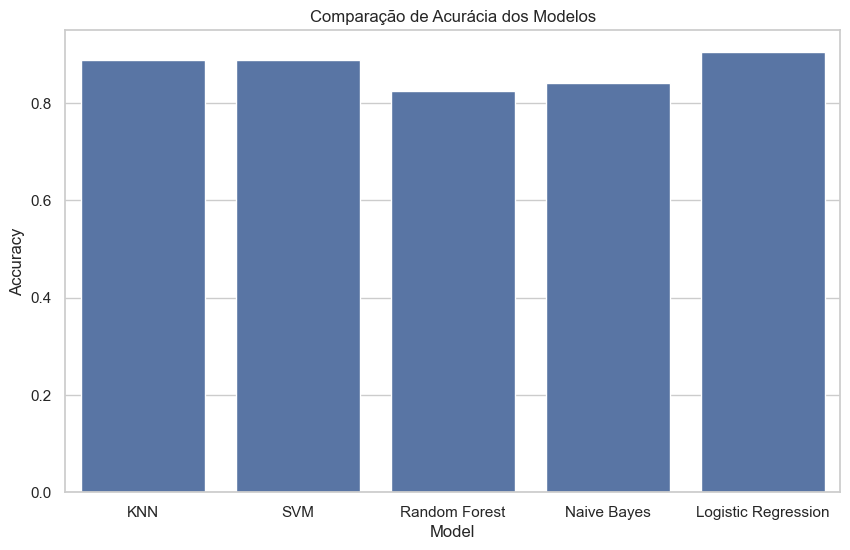

In [238]:
def evaluate_models(X_train, X_test, y_train, y_test):
    # Dicionário para armazenar resultados
    results = {
        'Model': [],
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1 Score': [],
        'Confusion Matrix': []
    }
    
    # Definir modelos para avaliação
    models = {
        'KNN': KNeighborsClassifier(),
        'SVM': SVC(kernel='linear'),
        'Random Forest': RandomForestClassifier(),
        'Naive Bayes': GaussianNB(),
        'Logistic Regression': LogisticRegression(max_iter=1000)
    }
    
    # Normalização e PCA
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for model_name, model in models.items():
        # Ajuste do modelo
        model.fit(X_train_scaled, y_train)
        
        # Previsões
        y_pred = model.predict(X_test_scaled)
        
        # Avaliar métricas
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        # Armazenar resultados
        results['Model'].append(model_name)
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1 Score'].append(f1)
        results['Confusion Matrix'].append(conf_matrix)
        
    # Converter resultados para DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# Executar avaliação
results_df = evaluate_models(X_train, X_test, y_train, y_test)

# Exibir resultados
print(results_df)

# Visualizar as métricas
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Comparação de Acurácia dos Modelos')
plt.show()